In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [4]:
print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns.")

There are 48895 rows and 16 columns.


In [5]:
#checking for duplicate rows
duplicates = df.duplicated().sum()
print("There are {} duplicated rows".format(duplicates))

There are 0 duplicated rows


In [6]:
#Number of rows with missing values
NA_rows = df.isnull().any(axis = 1).sum() 
percent_missing = round((NA_rows/df.shape[0]) * 100, 2)
print(
    "There are {} rows with at least one missing value in this dataset.\nThis means {}% of the data is incomplete to some extent."
    .format(NA_rows, percent_missing))

There are 10074 rows with at least one missing value in this dataset.
This means 20.6% of the data is incomplete to some extent.


In [7]:
#number of missing entries per columnn
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#checking for pattern in rows with missing last_review and reviews_per_month
df[(df["last_review"].isnull() == True)].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0


last_review and reviews_per_month are both missing in 10,052 rows. Further analysis shows that the last_review and review_per_month columns are null for listings where the number_of_reviews is 0. These rows should not be dropped from the dataset because the listings without reviews represent the less popular AirBnBs. 

In [10]:
#checking for patterns in rows missing the listing name.
df[(df["name"].isnull() == True)].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0


In [11]:
#checking for patterns in rows missing the host name
df[(df["host_name"].isnull() == True)].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359


There doesn't appear to be any concerning trend in the rows missing the listing name or host name, so these rows don't need to be dropped from the dataset.

In [13]:
# Creating column "name_length" that shows the length of a listing
df["name_length"] = df["name"].astype(str) 
df["name_length"] = df["name_length"].str.split().str.len()

In [14]:
# Making name_length 0 where the listing name is missing
df['name_length'] = np.where((df['name'].isnull() == True), 0, df['name_length']) 

In [15]:
#Summary for quanititative columns excluding id and host_id columns
df.loc[:, (df.columns != 'id') & (df.columns != 'host_id')].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,6.107393
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,2.021387
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,5.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,6.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,7.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,29.000000


In [16]:
(df["price"] == 0).sum()

11

Since free AirBnBs listings seem unlikely, it's a bit interesting that the minimum price is 0. There are 11 rows where the price is listed as 0, so this may be a data entry error or missing data.

In [18]:
#Percentage of listing that have a minimum stay requirement of more than 7 days
round(((df["minimum_nights"]>7).sum()/df.shape[0]) * 100 ,2)

15.0

In [19]:
#Percentage of listing that require you to stay for at least a year
round(((df["minimum_nights"]>=365).sum()/df.shape[0]) * 100 ,2)

0.09

In [20]:
#Number of Neighbourhood groups and their names
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [21]:
#Number of room types and their names
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [22]:
#Number of AirBnB listings for each neighbourhood
df["id"].groupby(df["neighbourhood_group"]).count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

In [23]:
#Average price for neighbourhood groups
avg_prices = df["price"].groupby(df["neighbourhood_group"]).mean()
avg_prices

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

Text(0.5, 1.0, 'Average Room Prices for NYC Neighbourhood Groups ')

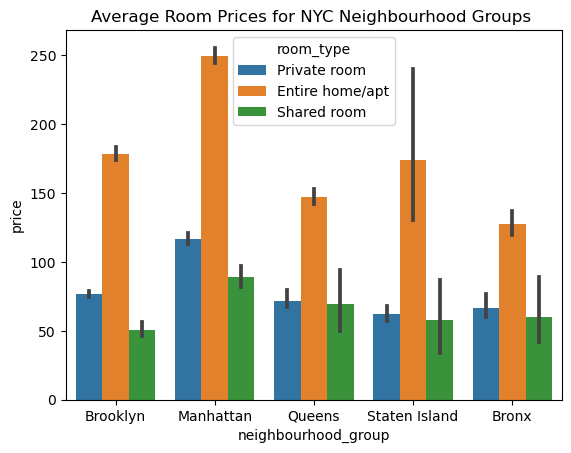

In [24]:
sb.barplot(data = df, x = "neighbourhood_group", y = "price", hue = "room_type").set_title("Average Room Prices for NYC Neighbourhood Groups ")

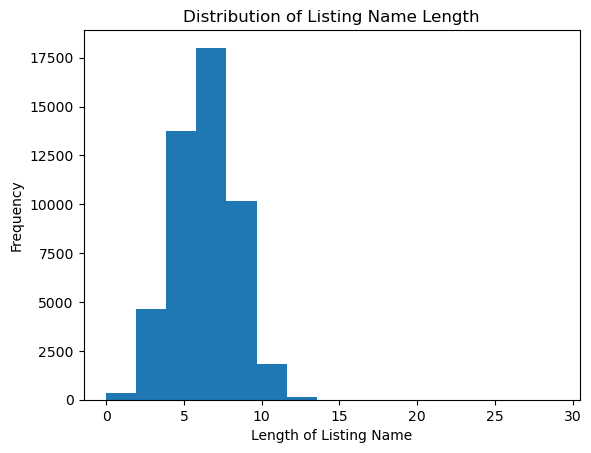

<Figure size 640x480 with 0 Axes>

In [25]:
plt.hist(data = df, x = "name_length", bins = 15)
plt.xlabel("Length of Listing Name")
plt.ylabel("Frequency")
plt.title("Distribution of Listing Name Length")
plt.show()
plt.clf()

In [26]:
#Number of neighbourhoods
len(df["neighbourhood"].unique())

221

In [27]:
#Number of neighbourhoods in each neighbourhood group
df["neighbourhood"].groupby(df["neighbourhood_group"]).nunique()

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64

In [28]:
#Number of AirBnBs fully booked for 2019
(df["availability_365"] == 0).sum()

17533

[Text(0.5, 1.0, 'Listing Price and Number of Reviews')]

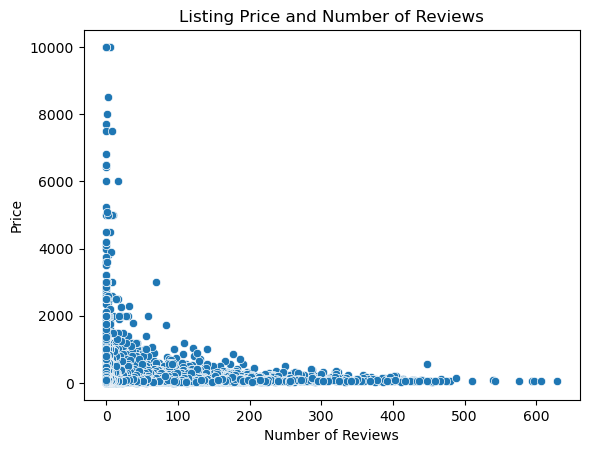

In [29]:
graph = sb.scatterplot(data = df, x = "number_of_reviews", y = "price")
graph.set(xlabel = "Number of Reviews")
graph.set(ylabel = "Price")
graph.set(title = "Listing Price and Number of Reviews")

The number of reviews increases as the price decreases. This is reasonable as cheaper AirBnBs are more accessible and likely have more guests than expensive AirBnBs.

In [31]:
#2019 10 AirBnB hosts with the most listings in NYC
df.groupby(["host_id", "host_name","neighbourhood_group"]).agg(
    count_col=pd.NamedAgg(column="host_id", aggfunc="count")
).sort_values(by = "count_col", ascending = False).head(10)

,,,count_col
host_id,host_name,neighbourhood_group,
219517861,Sonder (NYC),Manhattan,327
107434423,Blueground,Manhattan,230
30283594,Kara,Manhattan,121
12243051,Sonder,Manhattan,96
16098958,Jeremy & Laura,Manhattan,96
61391963,Corporate Housing,Manhattan,91
22541573,Ken,Manhattan,86
137358866,Kazuya,Queens,79
200380610,Pranjal,Manhattan,65


9 of the 10 NYC AirBnB hosts have their listings in Manhattan.